# Multi Layer Perceptron


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [3]:
# load the dataset
data = sns.load_dataset('tips')

# preprocessing
tips = pd.get_dummies(data,drop_first=True)

# select the target and feature
X = tips.drop('tip',axis = 1)
y = tips['tip']

# spliting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [10]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation = 'relu',input_shape = (X_train.shape[1],)),# input layer
    tf.keras.layers.Dense(32,activation = 'relu'),# hidden layer
    tf.keras.layers.Dense(1)# output layer for regression
])

# compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mean_squared_error'])


# train the model
model.fit(X_train,Y_train,epochs = 100,batch_size = 32,verbose = 1)

# evaluate the model
loss = model.evaluate(X_test,Y_test,verbose = 0)
print('Mean_Squared_Error:',loss[0])

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 10.7442 - mean_squared_error: 10.7442
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 8.9522 - mean_squared_error: 8.9522
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 7.4014 - mean_squared_error: 7.4014
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 6.0353 - mean_squared_error: 6.0353
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 4.7319 - mean_squared_error: 4.7319
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6311 - mean_squared_error: 3.6311
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 2.7473 - mean_squared_error: 2.7473
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 2.1959 - mean_squared_error: 2.1959
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 1.8583 - mean_squared_error: 1.8583
Epoch 10/100
7/7 [=================

Mean_Squared_Error: 0.8174344897270203


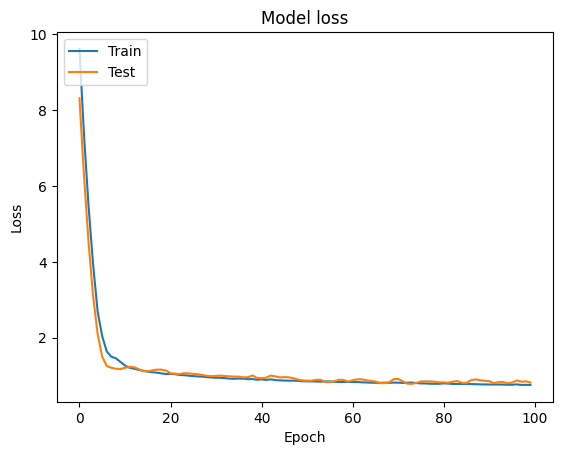

In [12]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation = 'relu',input_shape = (X_train.shape[1],)),# input layer
    tf.keras.layers.Dense(32,activation = 'relu'),# hidden layer
    tf.keras.layers.Dense(1)# output layer for regression
])

# compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

# train the model and plot the training data and testing loass and accuracy
history = model.fit(X_train,Y_train,epochs = 100,batch_size = 32,verbose = 0,validation_data = (X_test,Y_test))

# evaluate the model
loss = model.evaluate(X_test,Y_test,verbose = 0)
print('Mean_Squared_Error:',loss)

# plot the training data and testing data
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

---

### Early termination conditions

Mean_Squared_Error: 0.9485604166984558


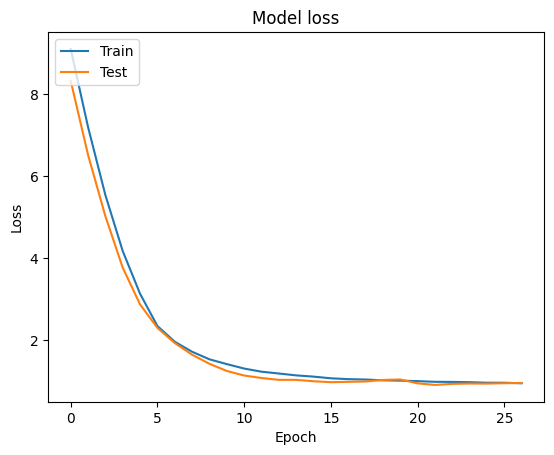

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation = 'relu',input_shape = (X_train.shape[1],)),# input layer
    tf.keras.layers.Dense(32,activation = 'relu'),# hidden layer
    tf.keras.layers.Dense(1)# output layer for regression
])

# compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

# early stopping
early_stop = EarlyStopping(monitor = 'val_loss',patience = 5)

# train the model and plot the training data and testing loass and accuracy
history = model.fit(X_train,Y_train,epochs = 100,batch_size = 32,verbose = 0,
                    validation_data = (X_test,Y_test),callbacks = [early_stop])

# evaluate the model
loss = model.evaluate(X_test,Y_test,verbose = 0)
print('Mean_Squared_Error:',loss)

# plot the training data and testing data
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
